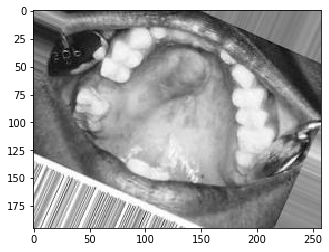

In [12]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np#array operations
import matplotlib.pyplot as plt
import os #iterate through directories and join paths
import cv2 #image operations

import numpy as np#array operations
import matplotlib.pyplot as plt
import os #iterate through directories and join paths
import cv2 #image operations

DATADIR = "Desktop/preprocessing/project"
CATEGORIES = ["cancerous_final" , "non_cancer_final"]

DATADIR = "Desktop/preprocessing/project"
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")#to graph it 
        break # we just want one for now so break
    break

    

In [13]:
print(img_array.shape)

(195, 258)


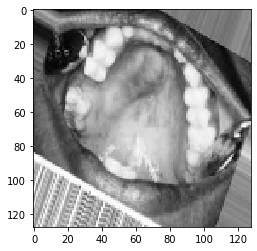

In [14]:
IMG_SIZE = 128

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
            
            
create_training_data()      

In [16]:
print(len(training_data))

2264


In [17]:
import random 

random.shuffle(training_data)

In [18]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
0
0
1
0
0
1


In [19]:
x = []
Y = []

for features,label in training_data:
    x.append(features)
    Y.append(label)

print(x[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[177]
   [183]
   [185]
   ...
   [ 85]
   [ 73]
   [ 61]]

  [[174]
   [182]
   [185]
   ...
   [ 99]
   [ 82]
   [ 66]]

  [[173]
   [180]
   [182]
   ...
   [117]
   [ 95]
   [ 75]]

  ...

  [[173]
   [178]
   [184]
   ...
   [ 43]
   [ 42]
   [ 41]]

  [[174]
   [178]
   [184]
   ...
   [ 41]
   [ 41]
   [ 41]]

  [[174]
   [179]
   [185]
   ...
   [ 42]
   [ 42]
   [ 42]]]]


In [20]:
import pickle

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [21]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

In [22]:
print(x[0])

[[[177]
  [183]
  [185]
  ...
  [ 85]
  [ 73]
  [ 61]]

 [[174]
  [182]
  [185]
  ...
  [ 99]
  [ 82]
  [ 66]]

 [[173]
  [180]
  [182]
  ...
  [117]
  [ 95]
  [ 75]]

 ...

 [[173]
  [178]
  [184]
  ...
  [ 43]
  [ 42]
  [ 41]]

 [[174]
  [178]
  [184]
  ...
  [ 41]
  [ 41]
  [ 41]]

 [[174]
  [179]
  [185]
  ...
  [ 42]
  [ 42]
  [ 42]]]
